<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>
<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه ای بر شبکه‌های عصبی کانولوشنالی<br>Convolutionl Neural Networks - CNN</div></center></h1>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
اگر روی گوگل کولب اجرا میکنید این خطوط را از حالت کامنت خارج نمائید.
</div>

In [1]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2025-06-18 06:42:24--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2025-06-18 06:42:24 (41.4 MB/s) - ‘dataset.py’ saved [917/917]

--2025-06-18 06:42:24--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">کد یک شبکه کانولوشنالی و آموزش آن از ابتدا تا انتها بر روی مجموعه داده هدی</div>


In [2]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=28)

In [3]:
# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [4]:
# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [5]:
# 5. Define model architecture
model = Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train, y_train,
          epochs=200, batch_size=256, validation_split=0.2)


Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.1936 - loss: 2.2342 - val_accuracy: 0.6500 - val_loss: 1.7906
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4900 - loss: 1.6360 - val_accuracy: 0.7657 - val_loss: 0.8945
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6521 - loss: 1.0688 - val_accuracy: 0.8143 - val_loss: 0.6062
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7203 - loss: 0.8284 - val_accuracy: 0.8357 - val_loss: 0.5001
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7702 - loss: 0.6805 - val_accuracy: 0.8814 - val_loss: 0.3990
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8029 - loss: 0.5903 - val_accuracy: 0.9086 - val_loss: 0.3133
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8334 - loss: 0.4832 - val_accuracy: 0.8971 - val_loss: 0.2837
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8667 - loss: 0.4306 - val_accuracy: 0

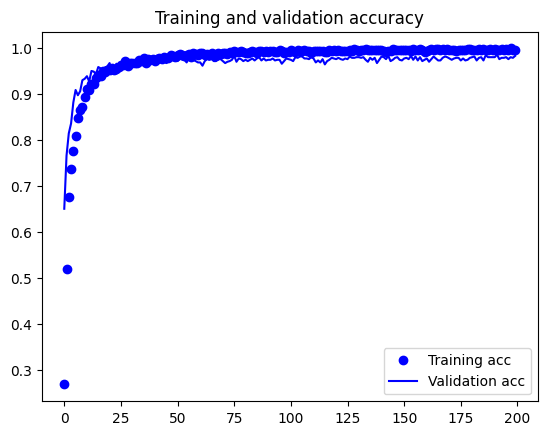

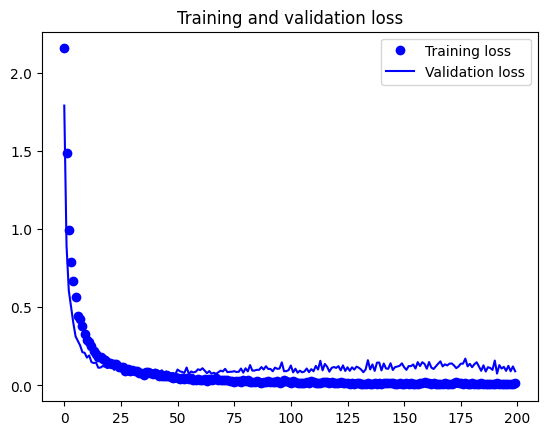

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9831 - loss: 0.1727


[0.1458754539489746, 0.9800000190734863]